In [1]:
# Introduction: 
# The goal of this project is to predict the type of physical activity (e.g., walking, climbing stairs) from tri-axial smartphone accelerometer data because smartphone accelerometers are precise and provide different patterns for acceleration.
# The input data used for trainig consists of two datasets. The first file, train_time_series.csv, contains the raw accelerometer data, which has been collected using the Beiwe research platform.
# It consists of the following parameters: timestamp, UTC time, accuracy, x, y, z
# The second file, train_labels.csv, contains the activity labels, and we have used these labels to train our model. Different activities have been numbered with integers. We use the following encoding: 1 = standing, 2 = walking, 3 = stairs down, 4 = stairs up.
# The primary aim of thsi project is to classify different physical activities as accurately as possible.
# To test our code, we are also provided a file called test_time_series.csv, and at the end of the project we're asked to provide the activity labels predicted by our code for this test data set.  
# In addition to providing the predictions, we have to provide the run time of our code also.

# Methods: 
# The approach adopted is that the training datasets have been merged based on their timestamp and the same is done with the test datasets. 
# The second step is to remove the unnecessary columns which do not contain necessary information using the 'dropna()' function
# The data can be visualized using various techniques but in this case the data has not been visualized.
# Now the training datasets have been trained using Random Forest Classifier at first and the test_time_series dataset is used to predict the labels in test_labels and stored in the test_labels datset.
# K fold cross validation method is used to measure the performance of various models
# A confusion matrix is plotted to check the accuracy of the model used.

import pandas as pd
import time
start_time = time.time()
df1 = pd.read_csv('train_time_series.csv') # reading the train_time_series dataset
df1.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [2]:
df2 = pd.read_csv('test_time_series.csv') # reading the test_time_series dataset
df2.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550


In [3]:
df3 = pd.read_csv('train_labels.csv') # reading the train_labels dataset
df3.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


In [4]:
df4 = pd.read_csv('test_labels.csv') # reading the test_labels dataset
df4.head()

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN


In [5]:
#merging train_time_series and train_labels to form a single dataset on the basis of timestamp
merged_train = df1.merge(df3, on='timestamp', how='inner')
merged_train.drop(columns=['accuracy'],inplace=True)
merged_train

,Unnamed: 0_x,timestamp,UTC time_x,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1
...,...,...,...,...,...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,-0.641953,-1.469177,0.301041,24289,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,-0.171616,-0.366074,-0.059082,24299,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,0.401810,-1.077698,0.258911,24309,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,0.330338,-1.470062,0.303894,24319,2019-08-06T16:51:45.037,4


In [6]:
#merging test_time_series and test_labels to form a single dataset on the basis of timestamp
merged_test = df2.merge(df4, on='timestamp', how='inner')
merged_test.drop(columns=['accuracy'],inplace=True)
merged_test

,Unnamed: 0_x,timestamp,UTC time_x,x,y,z,Unnamed: 0_y,UTC time_y,label
0,24339,1565110307041,2019-08-06T16:51:47.041,0.098282,-0.833771,0.118042,24339,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,0.348465,-0.946701,-0.051041,24349,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,0.377335,-0.849243,-0.026474,24359,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,0.110077,-0.520325,0.312714,24369,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,0.283478,-0.892548,-0.085876,24379,2019-08-06T16:51:51.050,NaN
...,...,...,...,...,...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,-0.043915,-0.242416,0.068802,25539,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,0.118271,-1.212097,0.357468,25549,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,0.667404,-0.978851,0.171906,25559,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,0.371384,-1.021927,-0.244446,25569,2019-08-06T16:53:50.373,NaN


In [7]:
# dropping the columns to form a new dataset for training
inputs = merged_train.drop(columns=['Unnamed: 0_x','timestamp','UTC time_x','Unnamed: 0_y','UTC time_y','label'])
inputs.head()

,x,y,z
0,-0.053802,-0.987701,0.068985
1,0.013718,-0.852371,-0.000870
2,0.145584,-1.007843,-0.036819
3,-0.099380,-1.209686,0.304489
4,0.082794,-1.001434,-0.025375


In [8]:
# initializing the columns to form a new dataset for training
target = merged_train.label
target.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
# using the train_test_split method 
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(inputs,target)

In [10]:
# using Randon Forest Classifier to train and test our dataset
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
test_inputs = merged_test.drop(columns=['Unnamed: 0_x','timestamp','UTC time_x','Unnamed: 0_y','UTC time_y','label'])
test_inputs.head()

,x,y,z
0,0.098282,-0.833771,0.118042
1,0.348465,-0.946701,-0.051041
2,0.377335,-0.849243,-0.026474
3,0.110077,-0.520325,0.312714
4,0.283478,-0.892548,-0.085876


In [12]:
test_target = merged_test.label
test_target.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: label, dtype: float64

In [13]:
result = model.predict(test_inputs)
result

array([2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
# storing the predictions (result) in test_labels
merged_test['label'] = result 

In [15]:
merged_test.head(125)

,Unnamed: 0_x,timestamp,UTC time_x,x,y,z,Unnamed: 0_y,UTC time_y,label
0,24339,1565110307041,2019-08-06T16:51:47.041,0.098282,-0.833771,0.118042,24339,2019-08-06T16:51:47.041,2
1,24349,1565110308043,2019-08-06T16:51:48.043,0.348465,-0.946701,-0.051041,24349,2019-08-06T16:51:48.043,2
2,24359,1565110309046,2019-08-06T16:51:49.046,0.377335,-0.849243,-0.026474,24359,2019-08-06T16:51:49.046,2
3,24369,1565110310048,2019-08-06T16:51:50.048,0.110077,-0.520325,0.312714,24369,2019-08-06T16:51:50.048,3
4,24379,1565110311050,2019-08-06T16:51:51.050,0.283478,-0.892548,-0.085876,24379,2019-08-06T16:51:51.050,2
...,...,...,...,...,...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,-0.043915,-0.242416,0.068802,25539,2019-08-06T16:53:47.366,2
121,25549,1565110428369,2019-08-06T16:53:48.369,0.118271,-1.212097,0.357468,25549,2019-08-06T16:53:48.369,2
122,25559,1565110429371,2019-08-06T16:53:49.371,0.667404,-0.978851,0.171906,25559,2019-08-06T16:53:49.371,2
123,25569,1565110430373,2019-08-06T16:53:50.373,0.371384,-1.021927,-0.244446,25569,2019-08-06T16:53:50.373,2


In [16]:
# calculating the accuracy of the model
model.score(test_inputs,result)

1.0

In [17]:
# Predicting the results
result = model.predict([['0.342072','-1.051315','-0.007614']])
result

array([4], dtype=int64)

In [18]:
from sklearn.model_selection import ShuffleSplit
# Shuffle split will shuffle our dataset into equal splits for our models and randomize them
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5)
cross_val_score(RandomForestClassifier(),inputs, target,cv=cv)
# result - majority of the time we get more than 80% accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

array([0.55263158, 0.39473684, 0.60526316, 0.65789474, 0.57894737])

In [19]:
# Now although we are getting more than 80% in linear regression but still we will try other models too using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(inputs,target):
    algos={
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(inputs,target)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
find_best_model_using_gridsearchcv(inputs,target)

,model,best_score,best_params
0,lasso,-0.036839,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,-0.510297,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(inputs, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
result = model.predict(test_inputs)
result

array([2, 3, 2, 3, 1, 3, 2, 4, 2, 2, 4, 3, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3,
       1, 2, 4, 3, 2, 2, 3, 2, 2, 4, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 4, 3, 3, 3, 2, 2, 4, 2, 2, 2, 3, 3,
       3, 3, 4, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 2, 4, 2, 3, 3, 3, 3, 4,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2], dtype=int64)

In [22]:
model.score(inputs, target)

1.0

In [27]:
y_predicted = model.predict(test_inputs)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

cm = confusion_matrix(result, y_predicted)

print ('Confusion Matrix :')
print(cm) 
print ('Accuracy Score :',accuracy_score(target, y_predicted)) 
print ('Report : ')
print (classification_report(target, y_predicted))

Confusion Matrix :
[[15  0  0  0]
 [ 0 59  0  0]
 [ 0  0 38  0]
 [ 0  0  0 13]]


ValueError: Found input variables with inconsistent numbers of samples: [375, 125]

Text(69.0, 0.5, 'true value')

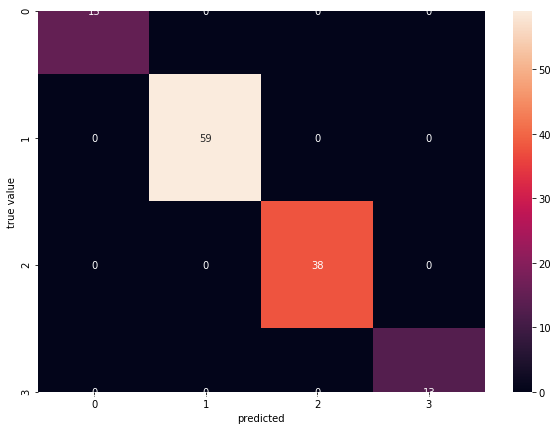

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot =True)
plt.xlabel('predicted')
plt.ylabel('true value')

In [43]:
# importing the results as csv file
import csv

labels = [2, 3, 2, 3, 1, 3, 2, 4, 2, 2, 4, 3, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3,
       1, 2, 4, 3, 2, 2, 3, 2, 2, 4, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 4, 3, 3, 3, 2, 2, 4, 2, 2, 2, 3, 3,
       3, 3, 4, 2, 2, 2, 2, 3, 4, 2, 3, 3, 2, 2, 2, 4, 2, 3, 3, 3, 3, 4,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2]
with open('predictions.csv','w', newline='') as csvfile:
    fieldnames = ['prediction_labels']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for label in labels:
        thewriter.writerow({ 'prediction_labels':label})

end_time = time.time()
total_time = str(end_time-start_time)

NameError: name 'time' is not defined

In [36]:
# Conclusion:
# The prediction can be done using various machine learning algorithms but in this case the Decision Tree Classifier is used
# The accuracy of the model can be increased by changing various features and parameters. 